In [1]:
exec(open("./mmj_functions.py").read())

In [2]:
import kmedoids

In [3]:
random.seed(122)
np.random.seed(122)

In [4]:
def MMJ_K_means_select_best_K(X, mmj_matrix):
    
    global dis_matrix 
    
    mmj_sc_list = []
    
    K_list = np.arange(2,31)
    
    K_list = [int(i) for i in K_list]
    
    for num_clusters in K_list:
 
        label, strong_ambi_p_idx, weak_ambi_p_idx = MMJ_K_means_using_PAM_algo_return(X, num_clusters, mmj_matrix)
 
        border_points = strong_ambi_p_idx + weak_ambi_p_idx
        new_X = np.array([X[i] for i in range(len(X)) if i not in border_points])
        new_label = np.array([label[i] for i in range(len(X)) if i not in border_points])
#         plot_2D_or_3D_data(new_X, new_label)
        new_X_idx = np.array([i for i in range(len(X)) if i not in border_points])
        dis_matrix = np.zeros((len(new_X_idx),len(new_X_idx)))

        for i, idx1 in enumerate(new_X_idx):
            for j, idx2 in enumerate(new_X_idx):
                dis_matrix[i,j] = mmj_matrix[idx1, idx2]
        mmj_sc = mmj_Silhouette_coefficient(new_X, new_label)
        mmj_sc_list.append(mmj_sc)
    best_K = K_list[np.argmax(mmj_sc_list)]
    
    return best_K, mmj_sc_list

In [5]:


def MMJ_K_means_using_PAM_algo_return(X, num_clusters, mmj_matrix, plot = False): 

    
    # import pdb;pdb.set_trace()
    km_model = kmedoids.fasterpam(mmj_matrix, num_clusters)
    label = km_model.labels
    centers_idx = [[ii] for ii in km_model.medoids]
    dis_to_medoids = np.array([[mmj_matrix[i,j] for j in km_model.medoids] for i in range(len(X))])
    min_dis_to_medoids = np.min(dis_to_medoids, axis = 1)

    strong_ambi_p_idx, weak_ambi_p_idx = [], []
    for i, _ in enumerate(dis_to_medoids):   
        ppp = np.sum(dis_to_medoids[i] == min_dis_to_medoids[i])
        if  ppp == 1:
            pass      
        elif ppp == num_clusters:
            strong_ambi_p_idx.append(i)      
        else:
            weak_ambi_p_idx.append(i)
    if plot: 
        if strong_ambi_p_idx or weak_ambi_p_idx:
            plot_2D_or_3D_data_empty_circles_weak_strong_multi_one_scom(X, label,centers_idx, strong_ambi_p_idx, weak_ambi_p_idx)        
        else:
            plot_2D_or_3D_data(X, label, centers_idx = centers_idx, plot_center = 1)
        
    return [label, strong_ambi_p_idx, weak_ambi_p_idx]

In [6]:
test_data_145 = pickle.load(  open( "./data/test_data_145.p", "rb" ) ) 

best_K:  20


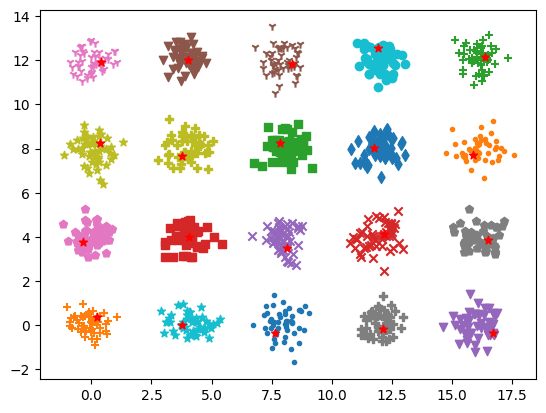

In [7]:
data_id  = 69

X = test_data_145[data_id] 
 
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058
mmj_distance_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)
 
# select best K (number of clusters) from range(2,31) with MMJ-SC
best_K, mmj_sc_list = MMJ_K_means_select_best_K(X, mmj_distance_matrix)

print("best_K: ", best_K)

label, strong_ambi_p_idx, weak_ambi_p_idx = MMJ_K_means_using_PAM_algo_return(X, best_K, mmj_distance_matrix, plot = True)


best_K:  3


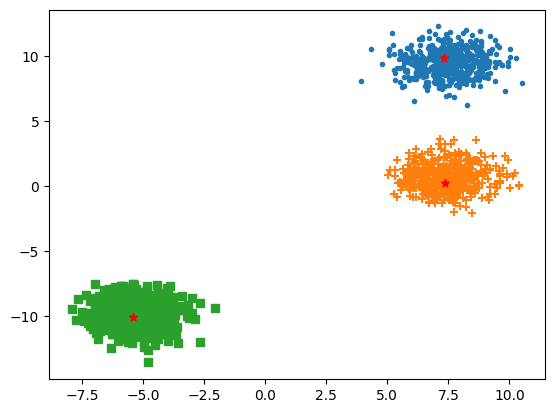

In [8]:
data_id  = 0

X = test_data_145[data_id] 
 
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058
mmj_distance_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)
 
# select best K (number of clusters) from range(2,31) with MMJ-SC
best_K, mmj_sc_list = MMJ_K_means_select_best_K(X, mmj_distance_matrix)

print("best_K: ", best_K)

label, strong_ambi_p_idx, weak_ambi_p_idx = MMJ_K_means_using_PAM_algo_return(X, best_K, mmj_distance_matrix, plot = True)

best_K:  3


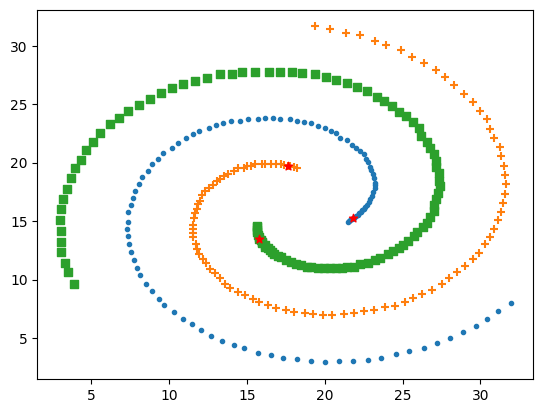

In [9]:
data_id  = 106

X = test_data_145[data_id] 
 
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058
mmj_distance_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)
 
# select best K (number of clusters) from range(2,31) with MMJ-SC
best_K, mmj_sc_list = MMJ_K_means_select_best_K(X, mmj_distance_matrix)

print("best_K: ", best_K)

label, strong_ambi_p_idx, weak_ambi_p_idx = MMJ_K_means_using_PAM_algo_return(X, best_K, mmj_distance_matrix, plot = True)

best_K:  15


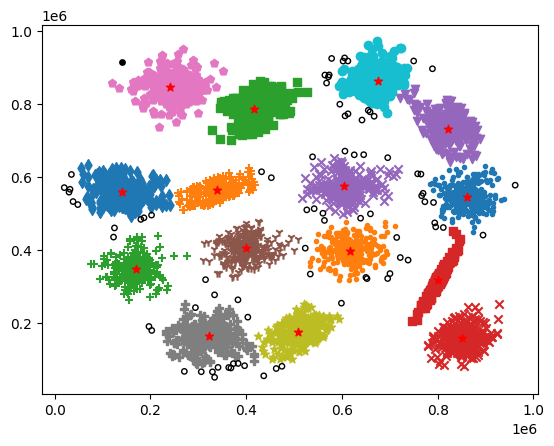

In [10]:
data_id  = 108

X = test_data_145[data_id] 
 
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058
mmj_distance_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)
 
# select best K (number of clusters) from range(2,31) with MMJ-SC
best_K, mmj_sc_list = MMJ_K_means_select_best_K(X, mmj_distance_matrix)

print("best_K: ", best_K)

label, strong_ambi_p_idx, weak_ambi_p_idx = MMJ_K_means_using_PAM_algo_return(X, best_K, mmj_distance_matrix, plot = True)


best_K:  3


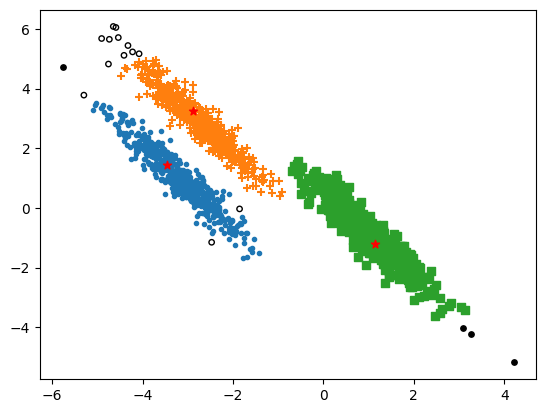

In [11]:
data_id  = 2

X = test_data_145[data_id] 
 
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058
mmj_distance_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)
 
# select best K (number of clusters) from range(2,31) with MMJ-SC
best_K, mmj_sc_list = MMJ_K_means_select_best_K(X, mmj_distance_matrix)

print("best_K: ", best_K)

label, strong_ambi_p_idx, weak_ambi_p_idx = MMJ_K_means_using_PAM_algo_return(X, best_K, mmj_distance_matrix, plot = True)


best_K:  6


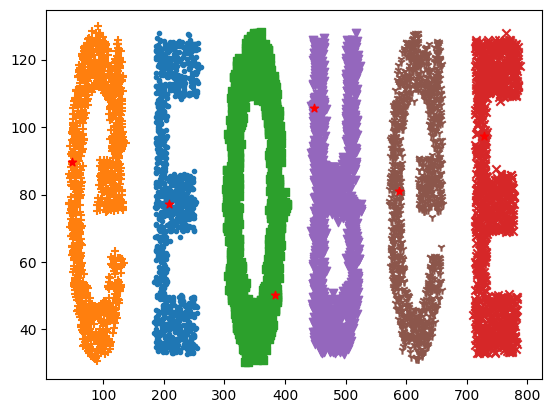

In [12]:
data_id  = 22

X = test_data_145[data_id] 
 
# Calculate MMJ distance matrix with Algorithm 4, implementation and testing of Algorithm 4 see another paper:
# http://www.arxiv.org/abs/2407.07058
mmj_distance_matrix =  cal_mmj_matrix_by_algo_4_Calculation_and_Copy(X)
 
# select best K (number of clusters) from range(2,31) with MMJ-SC
best_K, mmj_sc_list = MMJ_K_means_select_best_K(X, mmj_distance_matrix)

print("best_K: ", best_K)

label, strong_ambi_p_idx, weak_ambi_p_idx = MMJ_K_means_using_PAM_algo_return(X, best_K, mmj_distance_matrix, plot = True)
